req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\ribei\AppData\Local\Temp\fastf1.
	Size: 1.12 GB
core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.1.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '16', '31', '55', '3', '11', '4', '14', '18', '10', '5', '99', '63', '22', '7', '47', 

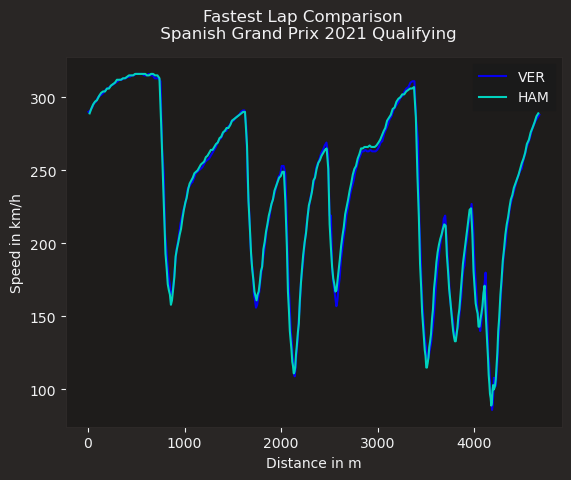

In [2]:
import matplotlib.pyplot as plt

import fastf1.plotting

DRIVER2 = 'HAM'
DRIVER1 = 'VER'
SESSION = 'Q'
GRAND_PRIX = 'Spanish Grand Prix'
YEAR = 2021

fastf1.plotting.setup_mpl(misc_mpl_mods=False)

rbr_color = fastf1.plotting.driver_color(DRIVER1)
mer_color = fastf1.plotting.driver_color(DRIVER2)
# load a session and its telemetry data
session = fastf1.get_session(YEAR, GRAND_PRIX, SESSION)
session.load()
ver_lap = session.laps.pick_driver(DRIVER1).pick_fastest()
ham_lap = session.laps.pick_driver(DRIVER2).pick_fastest()
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()
fig, ax = plt.subplots()
ax.plot(ver_tel['Distance'], ver_tel['Speed'], color=rbr_color, label=DRIVER1)
ax.plot(ham_tel['Distance'], ham_tel['Speed'], color=mer_color, label=DRIVER2)

ax.set_xlabel('Distance in m')
ax.set_ylabel('Speed in km/h')

ax.legend()
plt.suptitle(f"Fastest Lap Comparison \n "
             f"{session.event['EventName']} {session.event.year} Qualifying")

plt.show()

In [3]:
ver_tel

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2021-05-08 14:01:50.932,11538,290,7,100,False,12,car,0 days 00:00:00.051000,0 days 01:16:50.923000,4.108333
1,2021-05-08 14:01:51.172,10957,291,7,100,False,12,car,0 days 00:00:00.291000,0 days 01:16:51.163000,23.508333
2,2021-05-08 14:01:51.412,10685,293,8,100,False,12,car,0 days 00:00:00.531000,0 days 01:16:51.403000,43.041667
3,2021-05-08 14:01:51.652,10623,296,8,100,False,12,car,0 days 00:00:00.771000,0 days 01:16:51.643000,62.775000
4,2021-05-08 14:01:51.892,10839,297,8,100,False,12,car,0 days 00:00:01.011000,0 days 01:16:51.883000,82.575000
...,...,...,...,...,...,...,...,...,...,...,...
315,2021-05-08 14:03:06.653,11167,278,7,100,False,12,car,0 days 00:01:15.772000,0 days 01:18:06.644000,4599.961667
316,2021-05-08 14:03:06.893,11363,281,7,100,False,12,car,0 days 00:01:16.012000,0 days 01:18:06.884000,4618.695000
317,2021-05-08 14:03:07.133,11386,284,7,100,False,12,car,0 days 00:01:16.252000,0 days 01:18:07.124000,4637.628333
318,2021-05-08 14:03:07.373,11441,286,7,100,False,12,car,0 days 00:01:16.492000,0 days 01:18:07.364000,4656.695000


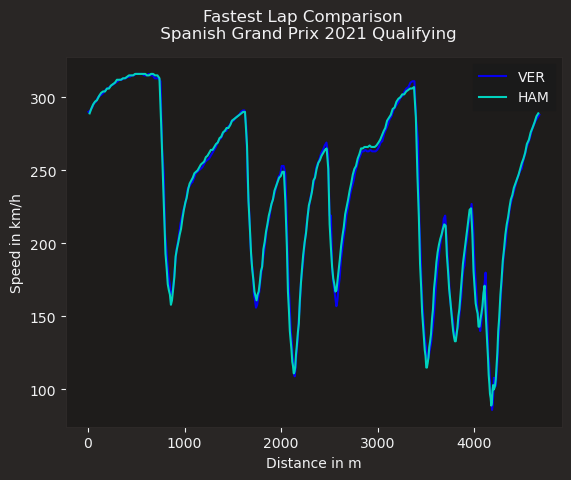

## Plotly Graph

In [162]:
import plotly.graph_objects as go

import matplotlib.pyplot as plt

import fastf1.plotting

DRIVER2 = 'HAM'
DRIVER1 = 'VER'
SESSION = 'Q'
GRAND_PRIX = 'Spanish Grand Prix'
YEAR = 2021

fastf1.plotting.setup_mpl(misc_mpl_mods=False)

rbr_color = fastf1.plotting.driver_color(DRIVER1)
mer_color = fastf1.plotting.driver_color(DRIVER2)
# load a session and its telemetry data
session = fastf1.get_session(YEAR, GRAND_PRIX, SESSION)
session.load()
ver_lap = session.laps.pick_driver(DRIVER1).pick_fastest()
ham_lap = session.laps.pick_driver(DRIVER2).pick_fastest()
ver_tel = ver_lap.get_car_data().add_distance()
ham_tel = ham_lap.get_car_data().add_distance()


ver_tel_data = {
    'Distance': ver_tel['Distance'],
    'Speed': ver_tel['Speed']
}

ham_tel_data = {
    'Distance': ham_tel['Distance'],
    'Speed': ham_tel['Speed']
}

ver_trace = go.Scatter(
    x=ver_tel_data['Distance'],
    y=ver_tel_data['Speed'],
    mode='lines',
    name='VER',
    line=dict(color=rbr_color)
)


ham_trace = go.Scatter(
    x=ham_tel_data['Distance'],
    y=ham_tel_data['Speed'],
    mode='lines',
    name=DRIVER2,
    line=dict(color=mer_color)
)

layout = go.Layout(
    title=f"Fastest Lap Comparison \n {session.event['EventName']} {session.event.year} Qualifying",
    xaxis=dict(title='Distance in m'),
    yaxis=dict(title='Speed in km/h'),
    legend=dict(x=0, y=1)
)

# Create figure and add traces
fig = go.Figure(data=[ver_trace, ham_trace], layout=layout)


core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v3.1.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '16', '31', '55', '3', '11', '4', '14', '18', '10', '5', '99', '63', '22', '7', '47', '6', '9']


core           INFO 	Loading data for Spanish Grand Prix - Race [v3.1.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


BEFORE : Values selected : 2021 - Spanish Grand Prix - VER - HAM
AFTER : Values selected : 2021 - Spanish Grand Prix - VER - HAM


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '16', '11', '3', '55', '4', '31', '10', '18', '7', '5', '63', '99', '6', '14', '47', '9', '22']


                       Date    RPM  Speed  nGear  Throttle  Brake  DRS Source  \
0   2021-05-09 14:18:47.787  10708    298      8       100  False   12    car   
1   2021-05-09 14:18:48.027  10844    301      8       100  False   12    car   
2   2021-05-09 14:18:48.267  10930    304      8       100  False   12    car   
3   2021-05-09 14:18:48.507  11060    307      8       100  False   12    car   
4   2021-05-09 14:18:48.708  11178    309      8       100  False   12    car   
..                      ...    ...    ...    ...       ...    ...  ...    ...   
329 2021-05-09 14:20:07.308  11141    273      7       100  False    0    car   
330 2021-05-09 14:20:07.509  11219    275      7       100  False    0    car   
331 2021-05-09 14:20:07.748  11298    278      7       100  False    0    car   
332 2021-05-09 14:20:08.028  11402    280      7       100  False    0    car   
333 2021-05-09 14:20:08.268  11477    283      7       100  False    0    car   

                      Time 

''
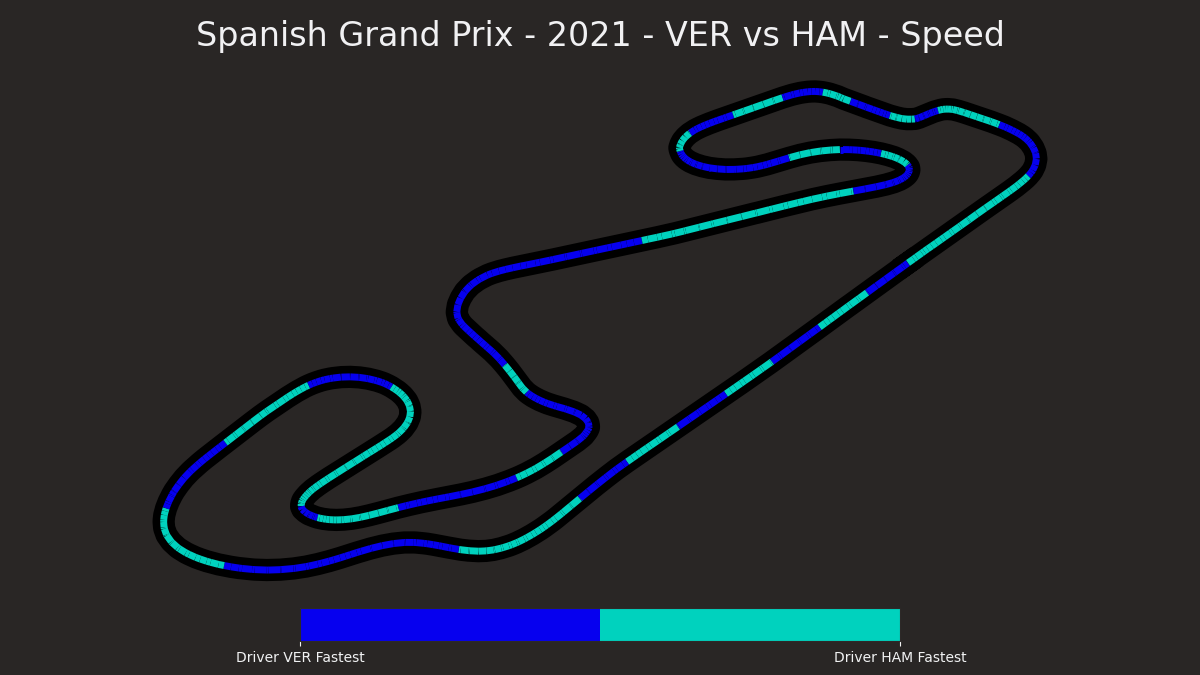

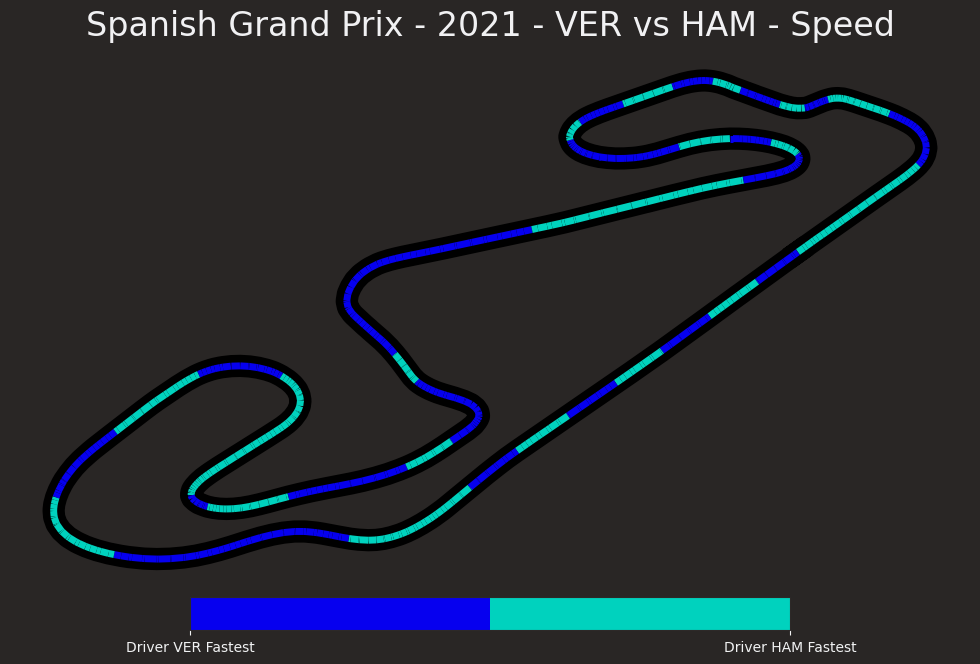

In [128]:
import fastf1 as ff1
import matplotlib as mpl
import numpy as np
from matplotlib.collections import LineCollection
import base64
from io import BytesIO

#session = fastf1.get_session(YEAR, GRAND_PRIX, SESSION)

def build_comparaison_tab(year, race, driver1, driver2):
    global session
    try:

        print(f"BEFORE : Values selected : {year} - {race} - {driver1} - {driver2}")

        if race == None:
            _1race = "Bahrain Grand Prix"
        else:
            _1race = race
        if driver1 == None:
            _driver1 = "VER"
        else:
            _driver1 = driver1
        if driver2 == None:
            _driver2 = "PER"
        else:
            _driver2 = driver2

        print(f"AFTER : Values selected : {year} - {_1race} - {_driver1} - {_driver2}")
        year_schedule = ff1.get_event_schedule(year)['EventName']
        indices = [index for index, country in enumerate(year_schedule) if country == _1race]
        _race = year_schedule[indices[0]]
        session = ff1.get_session(year, _1race, "R")
        session.load(telemetry=True, laps=True, weather=False)
        lap_driver1 = session.laps.pick_driver(_driver1).pick_fastest()
        lap_driver2 = session.laps.pick_driver(_driver2).pick_fastest()
        lap_driver1_with_dist = lap_driver1.get_car_data().add_distance()
        lap_driver2_with_dist = lap_driver2.get_car_data().add_distance()
        print(lap_driver2_with_dist)
        # Calculate lap times for both drivers
        lap = lap_driver1
        lap_time_driver1 = lap_driver1.telemetry['Time'].values
        lap_time_driver2 = lap_driver2.telemetry['Time'].values
        who_fastest = []

        if len(lap_time_driver1) < len(lap_time_driver2):
            # Make lap_time_driver1 the same length as lap_time_driver2
            lap_time_driver2 = lap_time_driver2[:len(lap_time_driver1)]
        elif len(lap_time_driver2) < len(lap_time_driver1):
            # Make lap_time_driver2 the same length as lap_time_driver1
            lap_time_driver1 = lap_time_driver1[:len(lap_time_driver2)]
        else:
            # Both arrays are already of the same length, no modification needed
            pass

        print(f"Length of the driver {driver1} : {len(lap_time_driver1)}")
        print(f"Length of the driver {driver2} : {len(lap_time_driver2)}")
        # Jump 10 laps at a time and compare lap times
        for i in range(0, len(lap_time_driver1) - 10, 10):
            lap_time_1_chunk = lap_time_driver1[i + 10] - lap_time_driver1[i]
            lap_time_2_chunk = lap_time_driver2[i + 10] - lap_time_driver2[i]

            if lap_time_1_chunk < lap_time_2_chunk:
                for j in range(10):
                    who_fastest.append(True)
            else:
                for j in range(10):
                    who_fastest.append(False)

        # Check if there are any remaining laps that are not a multiple of 10
        remaining_laps = len(lap_time_driver1) % 10
        if remaining_laps > 0:
            # Compare the remaining laps individually
            for i in range(len(lap_time_driver1) - remaining_laps, len(lap_time_driver1)):
                if lap_time_driver1[i] < lap_time_driver2[i]:
                    who_fastest.append(True)
                else:
                    who_fastest.append(False)
    # Get telemetry data
        x = lap.telemetry['X']  # values for x-axis
        y = lap.telemetry['Y']  # values for y-axis

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        # We create a plot with title and adjust some setting to make it look good.
        fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
        fig.suptitle(f'{_1race} - {year} - {_driver1} vs {_driver2} - Speed', size=24, y=0.97)

        # Adjust margins and turn of axis
        plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
        ax.axis('off')
        print(len(who_fastest))
        mask = np.array(who_fastest)  # Repeat each element 10 times for each sector

        # After this, we plot the data itself.
        # Create background track line
        ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)
        norm = plt.Normalize(0, 1)
        # Set the color based on the mask
        lc = LineCollection(segments, cmap=mpl.colors.ListedColormap([fastf1.plotting.driver_color(_driver1), fastf1.plotting.driver_color(_driver2)]), norm=norm, linewidth=5)
        lc.set_array(mask)

        # Set the values used for colormapping
        lc.set_array(mask)

        # Merge all line segments together
        line = ax.add_collection(lc)

        # Finally, we create a color bar as a legend.
        # Create a color bar as a legend.
        cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
        normlegend = mpl.colors.Normalize(vmin=0, vmax=1)  # Assuming 'who_fastest' contains True and False values
        legend_labels = [f"Driver {_driver1} Fastest", f"Driver {_driver2} Fastest"]
        legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=mpl.colors.ListedColormap([fastf1.plotting.driver_color(_driver1), fastf1.plotting.driver_color(_driver2)]),
                                           orientation="horizontal", ticks=[0, 1])
        legend.set_ticklabels(legend_labels)
        # Save it to a temporary buffer.
        buf = BytesIO()
        fig.savefig(buf, format="png")
        # Embed the result in the html output.
        fig_data = base64.b64encode(buf.getbuffer()).decode("ascii")
        fig_bar_matplotlib = f'data:image/png;base64,{fig_data}'

        return fig_bar_matplotlib
    
    except Exception as e:
        # Handle the error here
        print(f"Error occurred: {e}")
        # Create an image with the error message
        buf = BytesIO()
        fig = plt.figure()
        plt.text(0.5, 0.5, f"Error: {e}", ha='center', va='center', fontsize=10)
        plt.axis('off')  # Turn off axis for the error message
        fig.savefig(buf, format="png")
        # Embed the result in the html output.
        fig_data = base64.b64encode(buf.getbuffer()).decode("ascii")
        fig_bar_matplotlib = f'data:image/png;base64,{fig_data}'

        return fig_bar_matplotlib
    
build_comparaison_tab(YEAR, GRAND_PRIX, DRIVER1, DRIVER2)

core           INFO 	Loading data for Spanish Grand Prix - Race [v3.1.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '33', '77', '16', '11', '3', '55', '4', '31', '10', '18', '7', '5', '63', '99', '6', '14', '47', '9', '22']


There is 16 curves
There is 16 curves
The length of who : 269
The len of 680


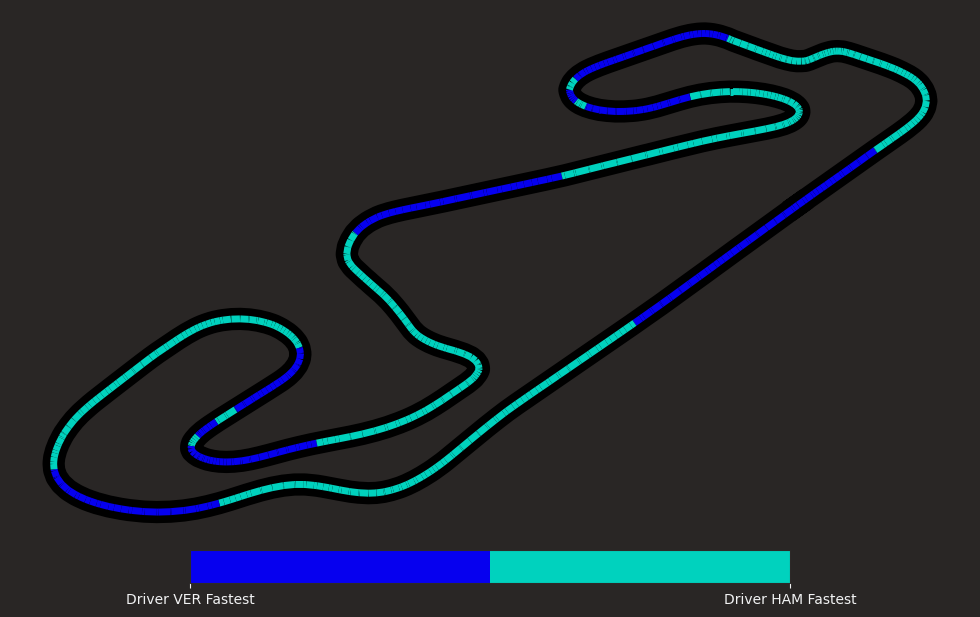

In [157]:
def build_comparaison_tab_test(year, race, driver1, driver2):
    if race == None:
        _1race = "Bahrain Grand Prix"
    else:
        _1race = race
    if driver1 == None:
        _driver1 = "VER"
    else:
        _driver1 = driver1
    if driver2 == None:
        _driver2 = "PER"
    else:
        _driver2 = driver2
    year_schedule = ff1.get_event_schedule(year)['EventName']
    indices = [index for index, country in enumerate(year_schedule) if country == _1race]
    _race = year_schedule[indices[0]]
    session = ff1.get_session(year, _1race, "R")
    session.load(telemetry=True, laps=True, weather=False)
    lap_driver1 = session.laps.pick_driver(_driver1).pick_fastest()
    lap_driver2 = session.laps.pick_driver(_driver2).pick_fastest()
    lap_driver1_with_dist = lap_driver1.get_car_data().add_distance()
    lap_driver2_with_dist = lap_driver2.get_car_data().add_distance()
    
    interv_1_virages = createTuplesThrotles(lap_driver1_with_dist)
    interv_2_virages = createTuplesThrotles(lap_driver2_with_dist)
    
    who_fastest_throtles = []
    print(f"There is {len(interv_1_virages)} curves")
    print(f"There is {len(interv_2_virages)} curves")
    for index in range(len(interv_1_virages)):
        section_time_done_1 = df_to_compare_drive1['Time'][interv_1_virages[index][1]] - df_to_compare_drive1['Time'][interv_1_virages[index][0]]
        section_time_done_2 = df_to_compare_drive2['Time'][interv_2_virages[index][1]] - df_to_compare_drive2['Time'][interv_2_virages[index][0]]
        #print(f"Driver1 : {section_time_done_1} - Driver2 : {section_time_done_2}")
        if section_time_done_1 < section_time_done_2:
            endSection = interv_1_virages[index][1]
            start = interv_1_virages[index][0]
            for j in range(endSection - start):
                who_fastest_throtles.append(True)
        else:
            endSection = interv_1_virages[index][1]
            start = interv_1_virages[index][0]
            ranged = endSection - start
            for j in range(ranged):
                who_fastest_throtles.append(False)
    print(f"The length of who : {len(who_fastest_throtles)}")
    lap_driver1 = session.laps.pick_driver(DRIVER1).pick_fastest()
    x = lap_driver1.telemetry['X']  # values for x-axis
    y = lap_driver1.telemetry['Y']  # values for y-axis
    
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    print(f"The len of {len(segments)}")
    # We create a plot with title and adjust some setting to make it look good.
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
    
    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')
    
    mask = np.array(who_fastest_throtles)
    
    # After this, we plot the data itself.
    # Create background track line
    ax.plot(x, y, color='black', linestyle='-', linewidth=16, zorder=0)
    norm = plt.Normalize(0, 1)
    # Set the color based on the mask
    lc = LineCollection(segments, cmap=mpl.colors.ListedColormap([fastf1.plotting.driver_color(DRIVER1), fastf1.plotting.driver_color(DRIVER2)]), norm=norm, linewidth=5)
    lc.set_array(mask)
    
    # Set the values used for colormapping
    lc.set_array(mask)
    
    # Merge all line segments together
    line = ax.add_collection(lc)
    
    # Finally, we create a color bar as a legend.
    # Create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=0, vmax=1)  # Assuming 'who_fastest' contains True and False values
    legend_labels = [f"Driver {DRIVER1} Fastest", f"Driver {DRIVER2} Fastest"]
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=mpl.colors.ListedColormap([fastf1.plotting.driver_color(DRIVER1), fastf1.plotting.driver_color(DRIVER2)]),
                                       orientation="horizontal", ticks=[0, 1])
    legend.set_ticklabels(legend_labels)
    # Save it to a temporary buffer.
    buf = BytesIO()
    fig.savefig(buf, format="png")
    # Embed the result in the html output.
    fig_data = base64.b64encode(buf.getbuffer()).decode("ascii")
    fig_bar_matplotlib = f'data:image/png;base64,{fig_data}'
    return lap_driver2_with_dist, lap_driver1_with_dist


df_to_compare_drive2,  df_to_compare_drive1 = build_comparaison_tab_test(YEAR, GRAND_PRIX, DRIVER1, DRIVER2)

In [102]:
def createTuplesDistance(df_to_compare):
    # Assuming your 'Distance' column data is in a list called 'distances'
    distances = df_to_compare['Distance'].values
    interval_length = 100
    start_index = 0
    end_index = 1
    intervals = []
    
    # Loop through the distances and create intervals
    for i, distance in enumerate(distances):
        # Calculate the interval index for the current distance
        if i+1 >= len(distances):
            intervals.append((start_index, len(distances)-1))
            break
        
        soustraction = distances[end_index] - distances[start_index]
        
        if soustraction > interval_length:
            intervals.append((start_index, end_index))
            start_index = i
            
        end_index = i
    return intervals

who_fastest = []
interv_1 = createTuplesDistance(df_to_compare_drive1)
interv_2 = createTuplesDistance(df_to_compare_drive2)
range_to_explore = 0

if len(interv_1) < len(interv_2):
    range_to_explore = len(interv_1)
else:
    range_to_explore = len(interv_2)

for index in range(range_to_explore):
    section_time_done_1 = df_to_compare_drive1['Time'][interv_1[index][1]] - df_to_compare_drive1['Time'][interv_1[index][0]]
    section_time_done_2 = df_to_compare_drive2['Time'][interv_2[index][1]] - df_to_compare_drive2['Time'][interv_2[index][0]]
    #print(f"Driver1 : {section_time_done_1} - Driver2 : {section_time_done_2}")
    if section_time_done_1 < section_time_done_2:
        who_fastest.append(True)
    else:
        who_fastest.append(False)
who_fastest

[False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False]

In [103]:
df_to_compare_drive2.head(50)

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,Distance
0,2021-05-09 14:18:47.787,10708,298,8,100,False,12,car,0 days 00:00:00.034000,0 days 01:48:47.779000,2.814444
1,2021-05-09 14:18:48.027,10844,301,8,100,False,12,car,0 days 00:00:00.274000,0 days 01:48:48.019000,22.881111
2,2021-05-09 14:18:48.267,10930,304,8,100,False,12,car,0 days 00:00:00.514000,0 days 01:48:48.259000,43.147778
3,2021-05-09 14:18:48.507,11060,307,8,100,False,12,car,0 days 00:00:00.754000,0 days 01:48:48.499000,63.614444
4,2021-05-09 14:18:48.708,11178,309,8,100,False,12,car,0 days 00:00:00.955000,0 days 01:48:48.700000,80.866944
5,2021-05-09 14:18:48.948,11245,314,8,100,False,12,car,0 days 00:00:01.195000,0 days 01:48:48.940000,101.800278
6,2021-05-09 14:18:49.188,11332,317,8,100,False,12,car,0 days 00:00:01.435000,0 days 01:48:49.180000,122.933611
7,2021-05-09 14:18:49.428,11440,318,8,100,False,12,car,0 days 00:00:01.675000,0 days 01:48:49.420000,144.133611
8,2021-05-09 14:18:49.668,11464,320,8,100,False,12,car,0 days 00:00:01.915000,0 days 01:48:49.660000,165.466944
9,2021-05-09 14:18:49.908,11452,321,8,100,False,12,car,0 days 00:00:02.155000,0 days 01:48:49.900000,186.866944


In [72]:
interv_1 = createTuplesDistance(df_to_compare_drive1)
interv_2 = createTuplesDistance(df_to_compare_drive2)

## Create function that creates mini section based on the curves of the circuit

In [147]:
df_to_compare['Distance'].values

array([2.81444444e+00, 2.28811111e+01, 4.31477778e+01, 6.36144444e+01,
       8.08669444e+01, 1.01800278e+02, 1.22933611e+02, 1.44133611e+02,
       1.65466944e+02, 1.86866944e+02, 2.08333611e+02, 2.29800278e+02,
       2.51333611e+02, 2.72866944e+02, 2.94400278e+02, 3.16000278e+02,
       3.37533611e+02, 3.59133611e+02, 3.84411389e+02, 4.06144722e+02,
       4.27878056e+02, 4.49611389e+02, 4.71344722e+02, 4.93078056e+02,
       5.18433611e+02, 5.40233611e+02, 5.61942778e+02, 5.87376111e+02,
       6.09176111e+02, 6.30976111e+02, 6.52776111e+02, 6.71033611e+02,
       6.92766944e+02, 7.14366944e+02, 7.34900278e+02, 7.53300278e+02,
       7.68900278e+02, 7.82900278e+02, 7.95566944e+02, 8.07500278e+02,
       8.19033611e+02, 8.30033611e+02, 8.40433611e+02, 8.50500278e+02,
       8.60166944e+02, 8.69900278e+02, 8.79966944e+02, 8.90366944e+02,
       9.01566944e+02, 9.13033611e+02, 9.24633611e+02, 9.36433611e+02,
       9.48366944e+02, 9.60700278e+02, 9.73314167e+02, 9.86447500e+02,
      

In [150]:
def createTuplesThrotles(df_to_compare):
    # Assuming your 'Distance', 'Throttle', and 'Brake' columns are in the DataFrame
    distances = df_to_compare['Distance'].values
    throttle = df_to_compare['Throttle'].values
    brake = df_to_compare['Brake'].values

    start_index = 0
    end_index = 0
    intervals = []
    new_section = True  # Initialize as True to capture the first interval
    new_section_2 = True  # Initialize as True to capture the first interval
    for i in range(len(distances)):
        if throttle[i] <= 10 or brake[i] == True:
            if not new_section:
                intervals.append((start_index, end_index - 1))
                start_index = end_index
            new_section = True
            new_section_2 = False
        else:
            if not new_section_2:
                intervals.append((start_index, end_index - 1))
                start_index = end_index
            new_section_2 = True
            new_section = False
        end_index += 1
    
    # Add the last interval if the data ends with a non-throttle or brake section
    if not new_section_2:
        intervals.append((distances[start_index], distances[end_index - 1]))
    
    return intervals


interv_1_virages = createTuplesThrotles(df_to_compare_drive1)
interv_1_virages

[(0, 35),
 (36, 44),
 (45, 90),
 (91, 99),
 (100, 120),
 (121, 131),
 (132, 156),
 (157, 162),
 (163, 211),
 (212, 222),
 (223, 238),
 (239, 248),
 (249, 264),
 (265, 270),
 (271, 277),
 (278, 285),
 (286, 289),
 (290, 290)]

There is 16 curves
There is 16 curves
The length of who : 269
The len of 680


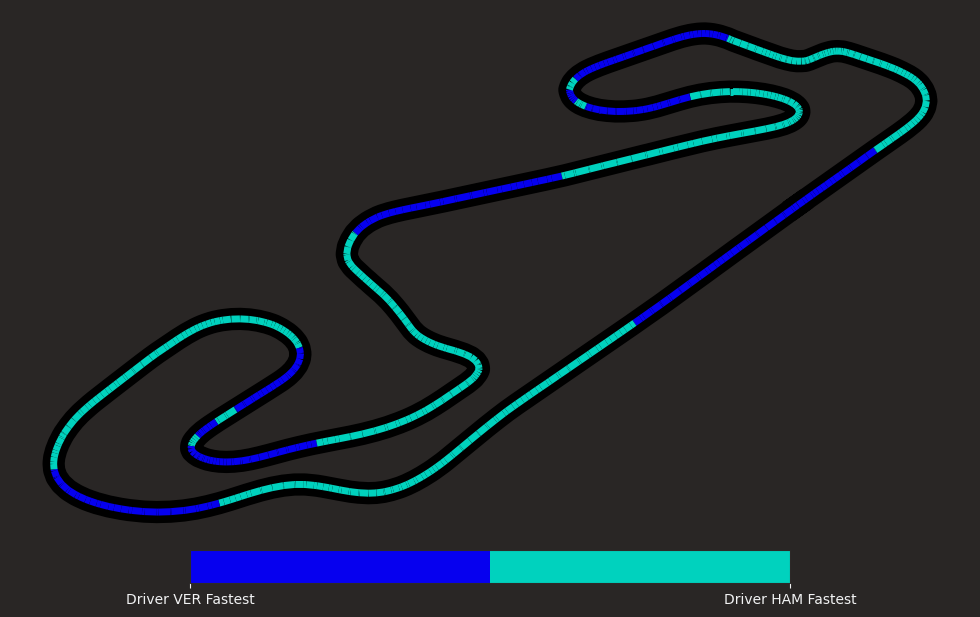

In [156]:
def createTuplesThrotles(df_to_compare):
    # Assuming your 'Distance', 'Throttle', and 'Brake' columns are in the DataFrame
    distances = df_to_compare['Distance'].values
    throttle = df_to_compare['Throttle'].values
    brake = df_to_compare['Brake'].values

    start_index = 0
    end_index = 0
    intervals = []
    new_section = True  # Initialize as True to capture the first interval
    new_section_2 = True  # Initialize as True to capture the first interval
    for i in range(len(distances)):
        if throttle[i] <= 30 and brake[i] == True:
            if not new_section:
                intervals.append((start_index, end_index - 1))
                start_index = end_index
            new_section = True
            new_section_2 = False
        else:
            if not new_section_2:
                intervals.append((start_index, end_index - 1))
                start_index = end_index
            new_section_2 = True
            new_section = False
        end_index += 1
    
    # Add the last interval if the data ends with a non-throttle or brake section
    if not new_section_2:
        intervals.append((distances[start_index], distances[end_index - 1]))
    
    return intervals


interv_1_virages = createTuplesThrotles(df_to_compare_drive1)
interv_2_virages = createTuplesThrotles(df_to_compare_drive2)

who_fastest_throtles = []
range_to_explore = 0
print(f"There is {len(interv_1_virages)} curves")
print(f"There is {len(interv_2_virages)} curves")
for index in range(len(interv_1_virages)):
    section_time_done_1 = df_to_compare_drive1['Time'][interv_1_virages[index][1]] - df_to_compare_drive1['Time'][interv_1_virages[index][0]]
    section_time_done_2 = df_to_compare_drive2['Time'][interv_2_virages[index][1]] - df_to_compare_drive2['Time'][interv_2_virages[index][0]]
    #print(f"Driver1 : {section_time_done_1} - Driver2 : {section_time_done_2}")
    if section_time_done_1 < section_time_done_2:
        endSection = interv_1_virages[index][1]
        start = interv_1_virages[index][0]
        for j in range(endSection - start):
            who_fastest_throtles.append(True)
    else:
        endSection = interv_1_virages[index][1]
        start = interv_1_virages[index][0]
        ranged = endSection - start
        for j in range(ranged):
            who_fastest_throtles.append(False)
print(f"The length of who : {len(who_fastest_throtles)}")
lap_driver1 = session.laps.pick_driver(DRIVER1).pick_fastest()
x = lap_driver1.telemetry['X']  # values for x-axis
y = lap_driver1.telemetry['Y']  # values for y-axis

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
print(f"The len of {len(segments)}")
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

mask = np.array(who_fastest_throtles)

# After this, we plot the data itself.
# Create background track line
ax.plot(x, y, color='black', linestyle='-', linewidth=16, zorder=0)
norm = plt.Normalize(0, 1)
# Set the color based on the mask
lc = LineCollection(segments, cmap=mpl.colors.ListedColormap([fastf1.plotting.driver_color(DRIVER1), fastf1.plotting.driver_color(DRIVER2)]), norm=norm, linewidth=5)
lc.set_array(mask)

# Set the values used for colormapping
lc.set_array(mask)

# Merge all line segments together
line = ax.add_collection(lc)

# Finally, we create a color bar as a legend.
# Create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=0, vmax=1)  # Assuming 'who_fastest' contains True and False values
legend_labels = [f"Driver {DRIVER1} Fastest", f"Driver {DRIVER2} Fastest"]
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=mpl.colors.ListedColormap([fastf1.plotting.driver_color(DRIVER1), fastf1.plotting.driver_color(DRIVER2)]),
                                   orientation="horizontal", ticks=[0, 1])
legend.set_ticklabels(legend_labels)
# Save it to a temporary buffer.
buf = BytesIO()
fig.savefig(buf, format="png")
# Embed the result in the html output.
fig_data = base64.b64encode(buf.getbuffer()).decode("ascii")
fig_bar_matplotlib = f'data:image/png;base64,{fig_data}'

In [127]:
lap = session.laps.pick_driver(DRIVER1).pick_fastest()

x = lap.telemetry['X']  # values for x-axis
y = lap.telemetry['Y']  # values for y-axis

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
len(segments)

680

In [161]:
session.get_circuit_info()

CircuitInfo(corners=              X            Y  Number Letter       Angle     Distance
0  -3728.050293 -7258.672852       1         -73.417940   835.406343
1  -4538.213867 -7090.668945       2          82.427713   928.506713
2  -6846.687012 -7532.823730       3        -123.521561  1180.989192
3  -5053.705078 -3172.251709       4          61.746705  1751.610028
4  -5760.503418 -6343.965332       5        -151.467456  2124.395145
5  -3511.338623 -5588.651855       6         -48.179459  2373.367555
6  -2657.036865 -4195.921875       7          14.858653  2553.192978
7  -3287.300781 -3536.369629       8        -147.354020  2640.672085
8  -3938.748047  -911.778870       9         155.821148  2924.172650
9    869.164917  1933.093018      10          13.736824  3509.408268
10  -326.263885  2196.596436      11         -62.899364  3645.440925
11 -1556.887329  2107.831055      12        -152.420540  3789.656418
12  -170.414062  3724.000000      13          89.888203  4033.558747
13   883.02648